In [1]:
from chroma_lar.geometry import build_detector_from_config
from chroma.sim import Simulation

g = build_detector_from_config('detector_config_noreflect', flatten=True, include_wires=False,
)
sim = Simulation(g, geant4_processes=0, photon_tracking=0, particle_tracking=0)


 d                 u
---->----•----->----
         \              
       W /             ____  ____   __   __ _  ____   __   ____  ____  
         \      e     / ___)(_  _) / _\ (  ( \(  __) /  \ (  _ \(    \
         •----->----  \___ \  )(  /    \/    / ) _) (  O ) )   / ) D ( 
         |            (____/ (__) \_/\_/\_)__)(__)   \__/ (__\_)(____/
       v X             __ _  ____  _  _  ____  ____   __   __ _   __   ____ 
         |            (  ( \(  __)/ )( \(_  _)(  _ \ (  ) (  ( \ /  \ / ___)
         •----->----  /    / ) _) ) \/ (  )(   )   /  )(  /    /(  O )\___ \
         \      e     \_)__)(____)\____/ (__) (__\_) (__) \_)__) \__/ (____/
       W /            
         \              
---->----•----->----
 d                 u   

Total PMT number is 128


/sdf/group/neutrino/youngsam/othert/chroma-lite/chroma/gpu/tools.py:46: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(60): warning #177-D: variable "NCHILD_MASK" was declared but never referenced
  const unsigned int NCHILD_MASK = (0xFFFFu << CHILD_BITS);
                     ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"


  mod = SourceModule(
/sdf/group/neutrino/youngsam/othert/chroma-lite/chroma/gpu/tools.py:46: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(60): warning #177-D: variable "NCHILD_MASK" was declared but never referenced
  const unsigned int NCHILD_MASK = (0xFFFFu << CHILD_BITS);
                     ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"


  mod = SourceModule(
/sdf/group/neutrino/youngsam/othert/chroma-lite/chroma/gpu/tools.py:46: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(60): warning #177-D: variabl

In [2]:
from chroma_lar.generator import photon_gen

# wavelength doesnt matter here since index of refraction is const
photons = photon_gen(500_000_000, (300,500), [1000,0,0])

ev = next(sim.simulate(
    photons,
    run_daq=True,
    photons_per_batch=1_000_000,
    keep_photons_beg=True,
    keep_photons_end=True,
    keep_hits=False,
    keep_flat_hits=True,
    max_steps=1000,
))

In [3]:
import numpy as np
from chroma.event import SURFACE_DETECT, NO_HIT, NAN_ABORT, SURFACE_ABSORB, BULK_ABSORB

detected_mask = (ev.photons_end.flags & SURFACE_DETECT) == SURFACE_DETECT
surface_absorbed_mask = (((ev.photons_end.flags & SURFACE_ABSORB) == SURFACE_ABSORB))
bulk_absorbed_mask = (((ev.photons_end.flags & BULK_ABSORB) == BULK_ABSORB))
nohit_mask = (ev.photons_end.flags & NO_HIT) == NO_HIT

# statistics
print(f"Total photons: {len(ev.photons_end.flags)}")
print(f"Detected: {np.sum(detected_mask)}")
print(f"No Hit: {np.sum(nohit_mask)}")
print(f"Surface Absorbed: {np.sum(surface_absorbed_mask)}")
print(f"Bulk Absorbed: {np.sum(bulk_absorbed_mask)}")
print(f"Aborted: {np.sum((ev.photons_end.flags & NAN_ABORT) == NAN_ABORT)}")

Total photons: 500000000
Detected: 13587304
No Hit: 0
Surface Absorbed: 486412570
Bulk Absorbed: 126
Aborted: 0


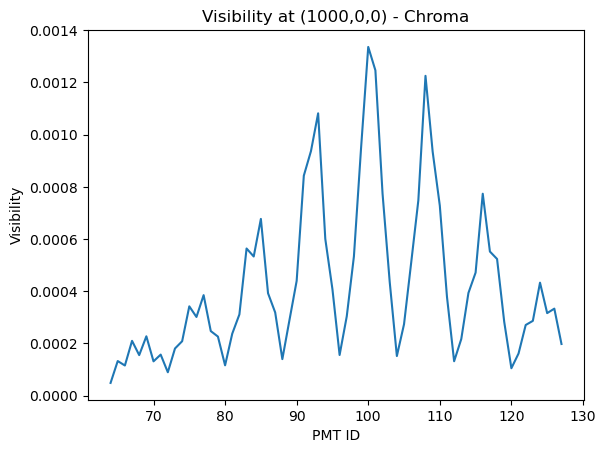

In [4]:
# create visibility values for each PMT: # det / total
import matplotlib.pyplot as plt

pmt_id, counts = np.unique(ev.flat_hits.channel, return_counts=True)

counts = counts / len(photons)
counts = counts[np.argsort(pmt_id)]
pmt_id = pmt_id[np.argsort(pmt_id)]

plt.plot(pmt_id, counts)
plt.title('Visibility at (1000,0,0) - Chroma')
plt.xlabel('PMT ID')
plt.ylabel('Visibility')
plt.show()

In [ ]:
from chroma_lar.utils import plot_geometry

plot_geometry(ev, build_detector_from_config('detector_config_noreflect', flatten=False, include_wires=False))